# Apparent Temperature Prediction
The solution is divided into the following sections:

- Data understanding , cleaning and exploration
- Data Preprocessing
- Data preparation
- Model building and evaluation

# 1.Data understanding , cleaning and exploration

In [84]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
#Importing Dataset
df=pd.read_csv('weather_data.csv')

In [86]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [87]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.0,5999.000000
mean,10.217695,8.958658,0.779488,10.007362,190.349558,9.476875,0.0,997.359828
std,10.565425,11.923712,0.173051,6.536619,107.026792,4.038583,0.0,145.173638
min,-14.088889,-22.094444,0.270000,0.000000,0.000000,0.000000,0.0,0.000000
25%,1.094444,-1.538889,0.680000,4.878300,122.000000,6.906900,0.0,1012.060000
50%,10.050000,10.050000,0.830000,9.064300,190.000000,9.982000,0.0,1016.840000
75%,18.722222,18.722222,0.920000,13.395200,287.000000,11.270000,0.0,1022.490000
max,34.005556,36.400000,1.000000,45.933300,359.000000,16.100000,0.0,1045.140000


From above data we can see that the dataset has 8 columns with numeric values and 4 columns with categorical values

### Cleaning the Dataset

In [88]:
#To check if data contains null values or not so that we can clean the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 12 columns):
Formatted Date              5999 non-null object
Summary                     5999 non-null object
Precip Type                 5999 non-null object
Temperature (C)             5999 non-null float64
Apparent Temperature (C)    5999 non-null float64
Humidity                    5999 non-null float64
Wind Speed (km/h)           5999 non-null float64
Wind Bearing (degrees)      5999 non-null int64
Visibility (km)             5999 non-null float64
Loud Cover                  5999 non-null int64
Pressure (millibars)        5999 non-null float64
Daily Summary               5999 non-null object
dtypes: float64(6), int64(2), object(4)
memory usage: 562.5+ KB


From above data it is clear there are no null values

In [89]:
for i in df.columns:
    print("Column : ",i,"\n",df[i].describe())
    print("---------------------------------------------------------------")

Column :  Formatted Date 
 count                              5999
unique                             5999
top       2006-01-19 13:00:00.000 +0100
freq                                  1
Name: Formatted Date, dtype: object
---------------------------------------------------------------
Column :  Summary 
 count              5999
unique               14
top       Partly Cloudy
freq               1791
Name: Summary, dtype: object
---------------------------------------------------------------
Column :  Precip Type 
 count     5999
unique       2
top       rain
freq      4762
Name: Precip Type, dtype: object
---------------------------------------------------------------
Column :  Temperature (C) 
 count    5999.000000
mean       10.217695
std        10.565425
min       -14.088889
25%         1.094444
50%        10.050000
75%        18.722222
max        34.005556
Name: Temperature (C), dtype: float64
---------------------------------------------------------------
Column :  Apparent Temper

From above data it is clear
- Loud Cover column has only 1 value.
- Formatted Date has all the values unique.


So,
 We can drop formatted date column and Loud Cover column as they are not helpful in predicting weather.



In [90]:
df=df.drop(["Formatted Date","Loud Cover"],axis=1)

### Performing EDA

In [91]:
df.apply(np.max)

Summary                        Windy and Partly Cloudy
Precip Type                                       snow
Temperature (C)                                34.0056
Apparent Temperature (C)                          36.4
Humidity                                             1
Wind Speed (km/h)                              45.9333
Wind Bearing (degrees)                             359
Visibility (km)                                   16.1
Pressure (millibars)                           1045.14
Daily Summary               Partly cloudy until night.
dtype: object

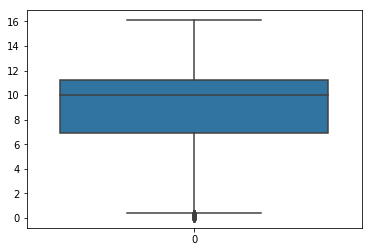

In [92]:
sns.boxplot(data=df['Visibility (km)'])

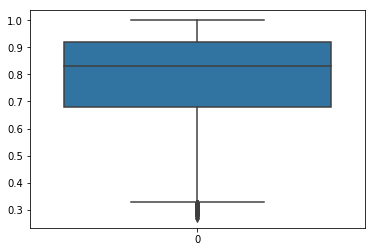

In [93]:
sns.boxplot(data=df['Humidity'])

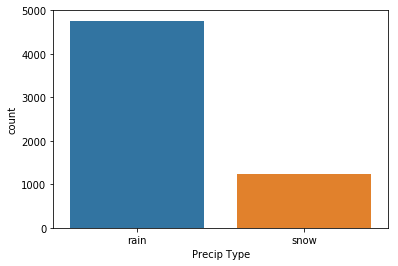

In [94]:
sns.countplot(x='Precip Type',data=df)

C:\Users\Hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


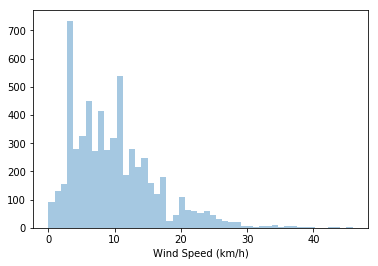

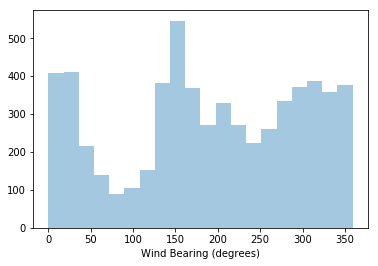

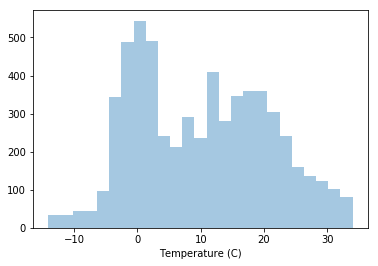

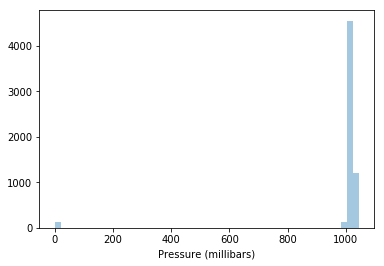

In [95]:
t=0
x=['Wind Speed (km/h)','Wind Bearing (degrees)','Temperature (C)','Pressure (millibars)']
for i in x:
    plt.figure(t)
    sns.distplot(df[i], kde=False, rug=False)
    t+=1

# Corelation matrix

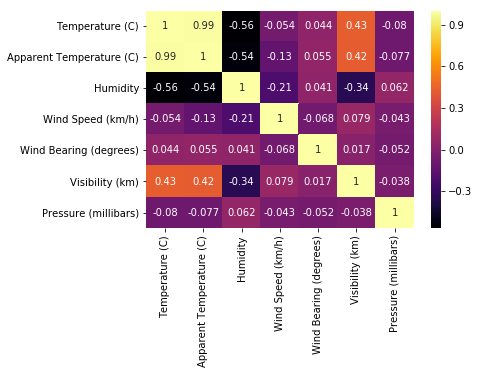

In [96]:
cor_mat=df[df.columns].corr()
sns.heatmap(cor_mat,annot=True , cmap ="inferno")

#### Since Apparent temprature has very low correlation with

- Wind speed

- Pressure

- Wind Bearing

So we have removed these columns for linear regression.


In [ ]:
#from sklearn.preprocessing import OneHotEncoder
#onehotencoder = OneHotEncoder(categorical_features = [0])
#x = onehotencoder.fit_transform(x).toarray()

In [97]:
df.keys()

Index(['Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [98]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [99]:
#x=df[['Summary','Precip Type','Temperature (C)','Humidity','Visibility (km)','Daily Summary']]
x=df[['Humidity','Visibility (km)']]
y=df['Apparent Temperature (C)']

In [100]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

In [101]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [102]:
y_pred = regressor.predict(x_test)

In [103]:
dfp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dfp.head(10)

,Actual,Predicted
84,5.161111,10.735039
2409,1.288889,-1.622575
4997,6.077778,2.511509
346,14.144444,6.345631
79,1.633333,1.792411
994,22.177778,9.477346
4952,12.661111,-0.756068
4078,23.466667,12.579852
3940,17.711111,10.640328
1870,-0.400000,-0.280746


In [104]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  7.506893820568987
Mean Squared Error:  89.49602190914916
Root Mean Squared Error:  9.460233713241399


In [105]:
print(metrics.r2_score(y_test, y_pred))

0.35496309335672627
